In [1]:
import pandas as pd
df = pd.read_csv("training.1600000.processed.noemoticon.csv", encoding = 'latin', header=None)

In [2]:
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [3]:
df.columns = ['sentiment', 'id', 'date', 'query', 'user_id', 'text']
df.head()

,sentiment,id,date,query,user_id,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


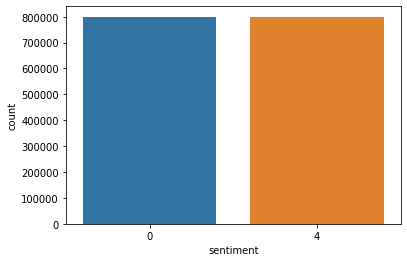

In [5]:
import seaborn as sns
sns.countplot(x="sentiment", data=df)

In [6]:
df['sentiment'] = df['sentiment'].replace(4,1)

In [7]:
df[['sentiment','text']].sample(10)

,sentiment,text
872403,1,@elisharene did you like the amount? I'm such ...
117748,0,Wanting to get out and cruise town and visit o...
632897,0,She has to go back second semester summer school
19352,0,Sometimes I just don't get it. I wish I got it.
1023471,1,searching through borders for books to buy...
1333432,1,@yarivs I'm sure you've already gotten flooded...
1528747,1,just laughing at the &quot;fantastic&quot; tra...
1354761,1,@BradMilner They have a Sims 3 app apparently
1438170,1,so the roomie and i have now decided we need t...
1537633,1,I broke a 1000 posts and didn't notice! Congra...


In [8]:
df['length'] = df['text'].apply(len)

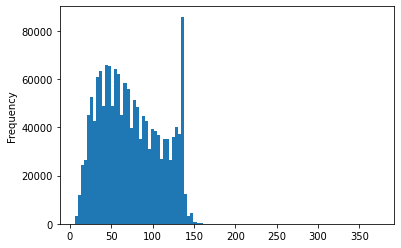

In [9]:
df['length'].plot(bins=100, kind='hist') 

In [10]:
df = df[['sentiment','text','length']]
df.describe()

,sentiment,length
count,1600000.0,1.600000e+06
mean,0.5,7.409011e+01
std,0.5,3.644114e+01
min,0.0,6.000000e+00
25%,0.0,4.400000e+01
50%,0.5,6.900000e+01
75%,1.0,1.040000e+02
max,1.0,3.740000e+02


In [11]:
df[df['length'] == 74]['text'].iloc[0]

"My thoughts are with Sandra Cantu's family at this difficult and sad time "

In [12]:
df[df['length'] == 6]['text'].iloc[0]

' just '

In [13]:
df[df['length'] == 374]['text'].iloc[0]

'@catfish_ohm à¹\x80à¸\x84à¹\x89à¸²à¹\x83à¸«à¹\x89à¸?à¸²à¸£à¹\x8cà¸\x95à¸¹à¸\x99à¸?à¸¸à¹\x82à¸£à¸°(à¸ªà¸±à¸ªà¹\x86+à¸¢à¸¹à¸£à¸´à¹?à¸?à¹\x84à¸\x94à¹\x89à¹?à¸\x97à¸\x99à¸\x99à¸°à¸\x9eà¸\xadà¸\x94à¸µà¸¡à¸´à¹\x82à¸?à¸°à¸«à¸§à¸\x87(à¸\x82à¸\x99à¸²à¸\x94à¹\x80à¸\x9fà¸´à¸\x99à¹?à¸?à¸¢à¸±à¸\x87à¹\x80à¸\x84à¸¢à¹\x83à¸«à¹\x89à¹\x84à¸¡à¹\x88à¹\x83à¸\x8aà¹\x88à¹\x80à¸«à¸£à¸\xad.à¹?à¸\x95à¹\x88à¸\x8aà¹\x88à¸²à¸\x87à¹\x80à¸«à¸\xadà¸°à¸£à¸²à¸¢à¸\x99à¸±à¹\x89à¸\x99à¹\x80à¸\x82à¸²à¹\x82à¸¡à¹\x80à¸\xadà¸°à¸?à¸§à¹\x88à¸²à¸\x9bà¸¥à¸²à¹?à¸¡à¸§à¹\x80à¸¢à¸\xadà¸° = '

In [14]:
sentences = df['text'].tolist()
sentences_string = " ".join(sentences)

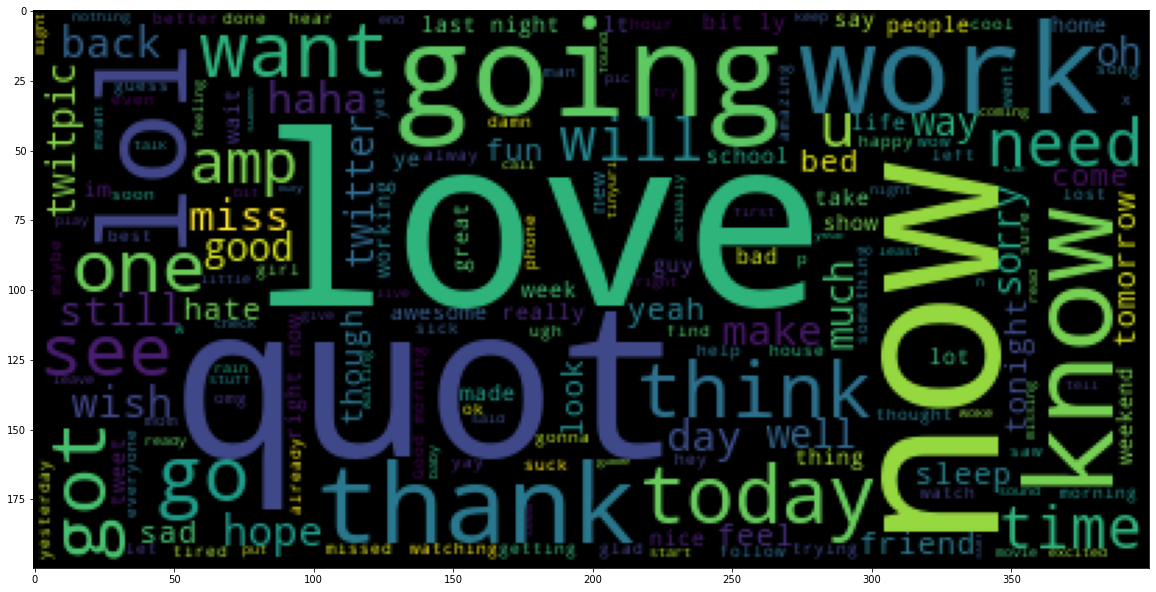

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_string))

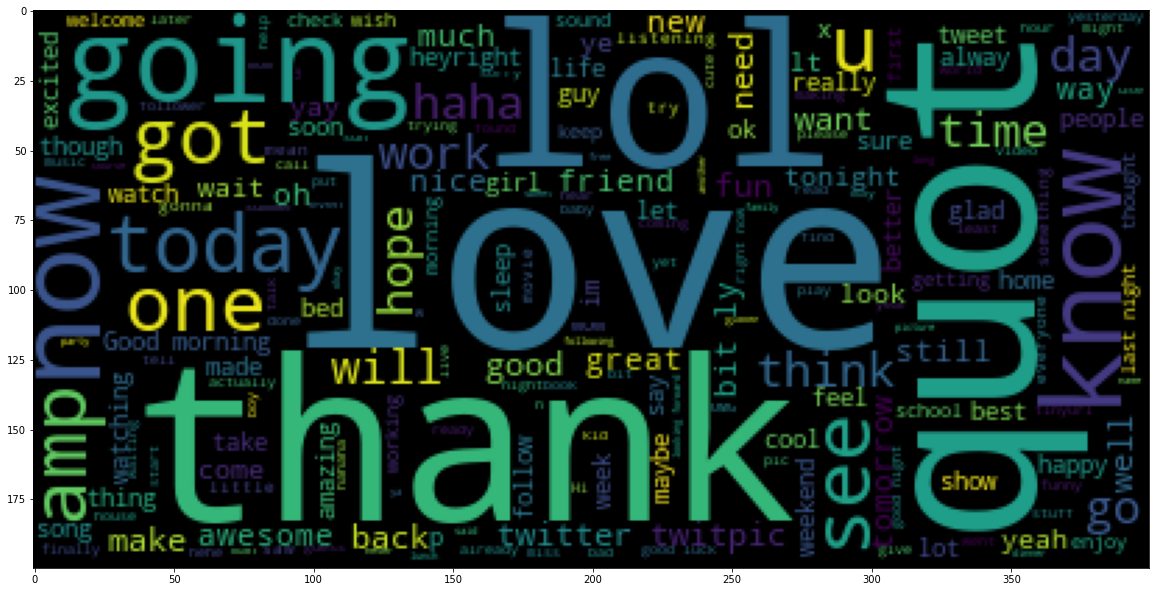

In [16]:
sentences = df[df['sentiment'] == 1]['text'].tolist()
sentences_string = " ".join(sentences)

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_string))

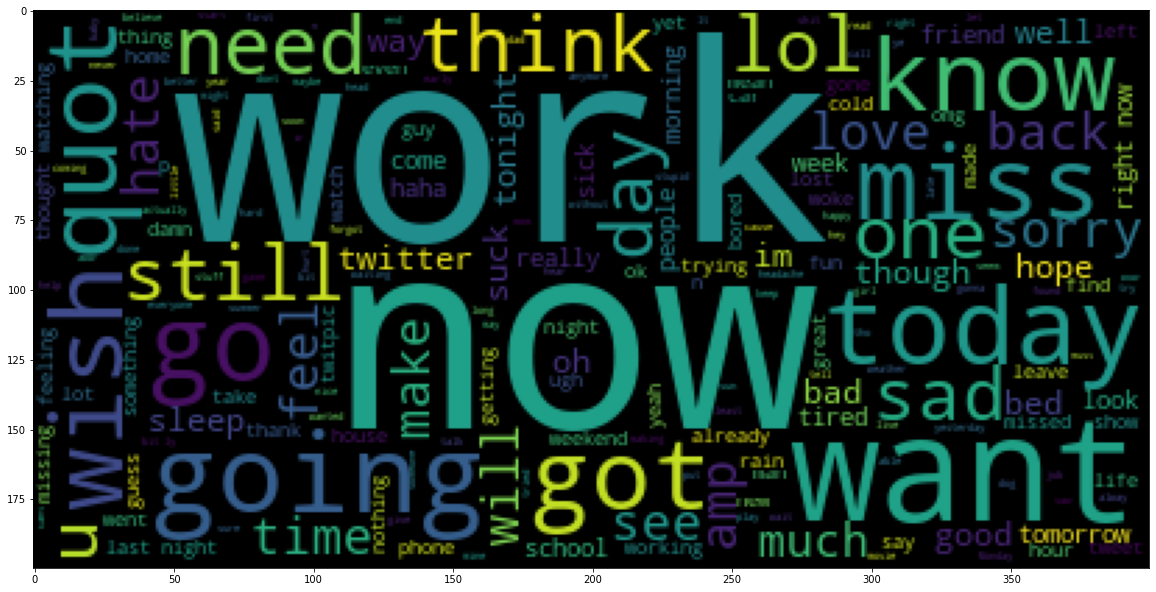

In [17]:
sentences = df[df['sentiment'] == 0]['text'].tolist()
sentences_string = " ".join(sentences)

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_string))

In [18]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [19]:
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vkatz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [20]:
def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [ ]:
#df_clean = df['text'].apply(message_cleaning)

In [ ]:
#print(df_clean[10])

In [ ]:
#print(df['text'][10])

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = message_cleaning, dtype = 'uint8')
df_countvectorizer = vectorizer.fit_transform(df['text'])

In [22]:
df_countvectorizer.shape

(1600000, 969103)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_countvectorizer, df['sentiment'],test_size = 0.25, random_state = 0)

In [24]:
X_train.shape

(1200000, 969103)

In [25]:
X_test.shape

(400000, 969103)

In [26]:
y_train.shape

(1200000,)

In [27]:
y_test.shape

(400000,)

In [28]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

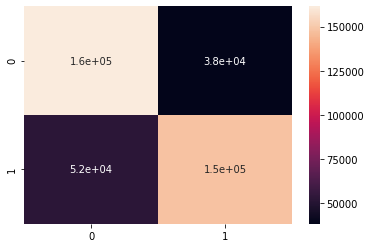

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [30]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.76      0.81      0.78    199734
           1       0.79      0.74      0.77    200266

    accuracy                           0.77    400000
   macro avg       0.78      0.77      0.77    400000
weighted avg       0.78      0.77      0.77    400000



In [31]:
from sklearn.naive_bayes import BernoulliNB
BNBmodel = BernoulliNB(alpha = 2)
BNBmodel.fit(X_train, y_train)

BernoulliNB(alpha=2, binarize=0.0, class_prior=None, fit_prior=True)

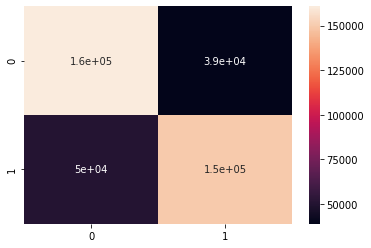

In [32]:
y_predict_test = BNBmodel.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [33]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.76      0.81      0.78    199734
           1       0.79      0.75      0.77    200266

    accuracy                           0.78    400000
   macro avg       0.78      0.78      0.78    400000
weighted avg       0.78      0.78      0.78    400000



In [34]:
from sklearn.linear_model import LogisticRegression
LRmodel = LogisticRegression(C =2, max_iter=1000, n_jobs=1)
LRmodel.fit(X_train, y_train)

C:\Users\vkatz\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=1, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

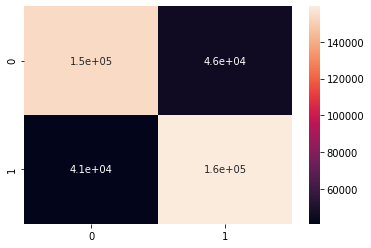

In [35]:
y_predict_test = LRmodel.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [36]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78    199734
           1       0.78      0.80      0.79    200266

    accuracy                           0.78    400000
   macro avg       0.78      0.78      0.78    400000
weighted avg       0.78      0.78      0.78    400000

